In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
import re
#import sys  
#from collections import Counter 

In [3]:
#import data
alldata = pd.read_csv('archive/alldata.csv')
alldata

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


In [4]:
alldata.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [5]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [6]:
alldata['reviews'] = alldata['reviews'].fillna(0) #replace NA with 0

In [7]:
sum(alldata.isnull().any(axis=1)) #check number of rows with all NA values

11

In [8]:
alldata = alldata.dropna()

## How many jobs in each state?

In [9]:
#create a new column with only city name and state
location1 = [str(row).rstrip() for row in alldata['location']] #remove space at the end of the string
location1 = [re.sub('[\s*]+[\d]+[\d]+[\d]+[\d]+[\d]','',row) for row in location1] #remove 5 numbers(zipcode)
location1

['Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlanta, GA',
 'Atlant

In [10]:
alldata['location1'] = pd.Series(location1,index = alldata.index)
#location = location.rstrip()#The rstrip() method removes any trailing characters (characters at the end a string), space is the default trailing character to remove.

<ipython-input-10-48c1649401a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata['location1'] = pd.Series(location1,index = alldata.index)


In [11]:
alldata['location1'].nunique()

92

In [12]:
#\d matches [0-9], \s for whitespace
#re.sub('[\s+]+[\d]+[\d]+[\d]+[\d]+[\d]', '', location)

In [13]:
#filter out the state
state = [row.split(', ')[-1] for row in alldata['location1']]
state

['GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',
 'GA',

In [14]:
#create a new column named state
alldata['state'] = pd.Series(state,index = alldata.index)

<ipython-input-14-b18cea100cab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata['state'] = pd.Series(state,index = alldata.index)


In [15]:
alldata['state'].unique()

array(['GA', 'TX', 'CO', 'MA', 'IL', 'DC', 'CA', 'NY', 'NJ', 'WA'],
      dtype=object)

In [16]:
#filter out the city
city = [row.split(', ')[0] for row in alldata['location1']]
alldata['city'] = pd.Series(city,index = alldata.index)

<ipython-input-16-84712797e07f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata['city'] = pd.Series(city,index = alldata.index)


In [17]:
alldata.head()

,position,company,description,reviews,location,location1,state,city
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA",GA,Atlanta
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA",GA,Atlanta
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA",GA,Atlanta


In [18]:
#count unique state in the dataset
state_count = alldata.groupby('state').size() #size() counts the number of the elements
state_count

state
CA    2152
CO     251
DC     340
GA     269
IL     471
MA    1323
NJ      68
NY     926
TX     218
WA     935
dtype: int64

In [19]:
city_count = alldata.groupby('city').size()
city_count = city_count.sort_values(ascending = False)
city_count = city_count.head(30)
#city_count.head(30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

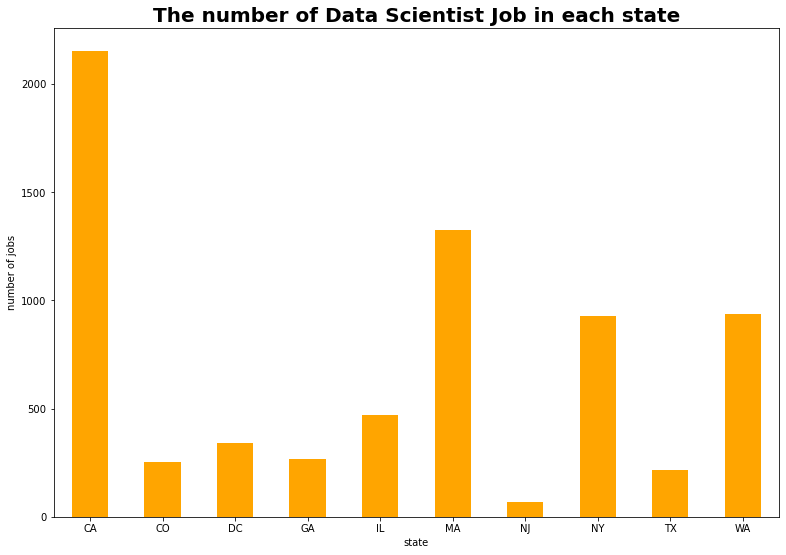

In [20]:
state_count.plot(kind='bar',figsize=(13,9), color = 'orange')
plt.ylabel('number of jobs')
plt.title('The number of Data Scientist Job in each state',weight='bold',size=20)
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'The number of Data Scientist Job in each city')

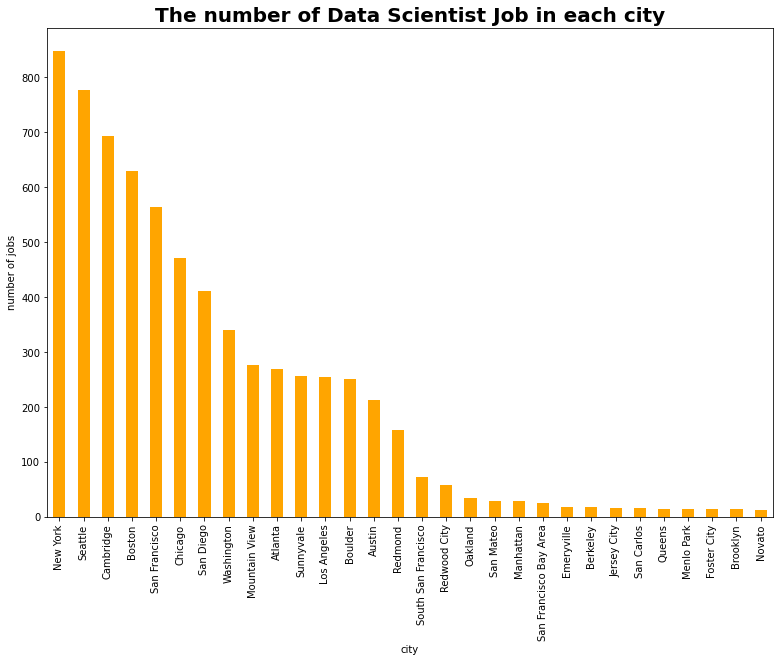

In [21]:
city_count.plot(kind='bar',figsize=(13,9), color = 'orange')
plt.ylabel('number of jobs')
plt.title('The number of Data Scientist Job in each city',weight='bold',size=20)
#plt.xticks(rotation = 15)

## What are the top 10 companies that have more positions?

In [22]:
companies = alldata.groupby(['company'])
freq = companies.size() #count number of positions for each company
freq

company
10x Genomics                 1
1199SEIU Family of Funds     1
1871                         1
23andMe                     17
24 Hour Fitness              1
                            ..
uBiome                       1
xentity corporation          5
zulily                       7
Øptimus Consulting           1
쿠팡                           2
Length: 2213, dtype: int64

In [23]:
#create a dataframe with company's name and how many times it appeared in dataset
companycount = pd.DataFrame(freq)
companycount

,0
company,
10x Genomics,1
1199SEIU Family of Funds,1
1871,1
23andMe,17
24 Hour Fitness,1
...,...
uBiome,1
xentity corporation,5
zulily,7


In [24]:
companycount = companycount.sort_values(0,ascending = False) #sort values with descending order
companycount

,0
company,
Amazon.com,358
Ball Aerospace,187
Microsoft,137
Google,134
NYU Langone Health,77
...,...
MedStar Health,1
McKesson,1
Maxus,1


In [25]:
top_companies = companycount.head(10) #show top 10 companies
top_companies

,0
company,
Amazon.com,358
Ball Aerospace,187
Microsoft,137
Google,134
NYU Langone Health,77
Fred Hutchinson Cancer Research Center,70
KPMG,66
Lab126,50
Facebook,49


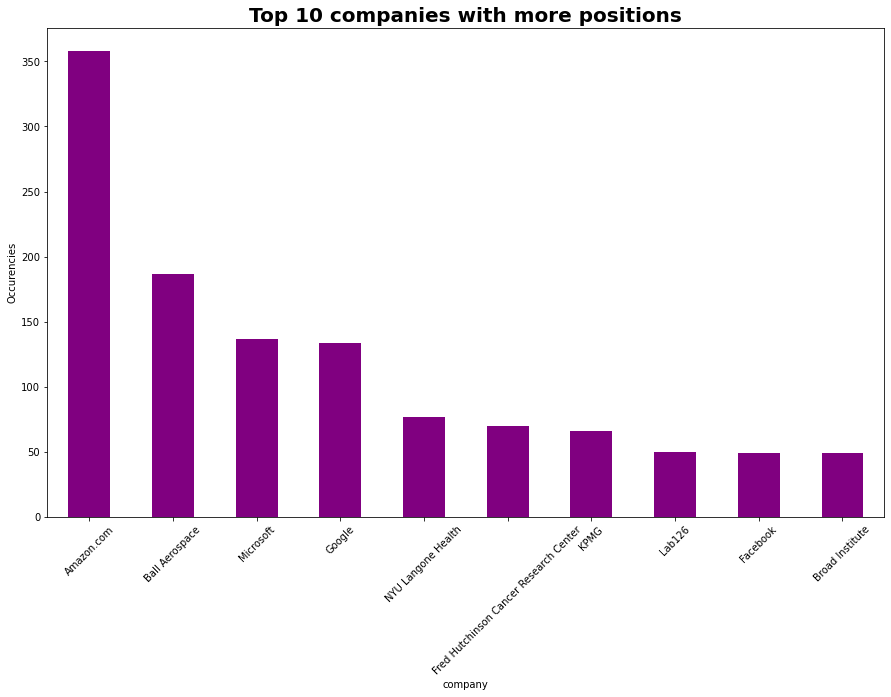

In [26]:
#bar chart
top_companies.plot(kind='bar',figsize=(15,9), color = 'purple')
plt.xticks(rotation=45)
plt.ylabel('Occurencies')
plt.title("Top 10 companies with more positions",weight='bold',size=20)
plt.legend().set_visible(False)

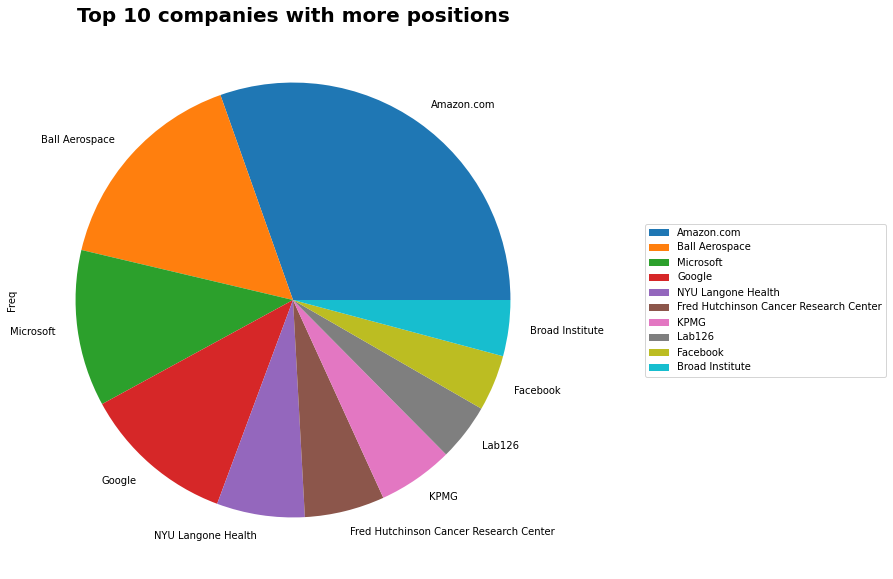

In [27]:
#top 10 companies in the dataset with higher occurencies
top_companies.plot(kind='pie', y=0, figsize=(15,10))
plt.ylabel('Freq')
plt.title("Top 10 companies with more positions",weight='bold',size=20)
plt.legend(loc="center right", bbox_to_anchor=(1.6,0.5))

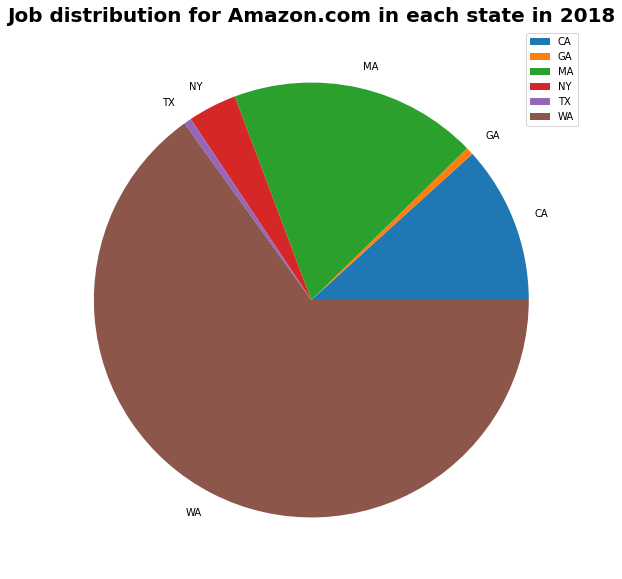

In [28]:
#how many jobs from amazon in each state
amazon = alldata[alldata['company'] == 'Amazon.com']
amazon.groupby('state').size().plot(kind='pie', figsize=(15,10))
plt.ylabel('')
plt.title('Job distribution for Amazon.com in each state in 2018', weight='bold',size=20)
plt.legend(loc="best")

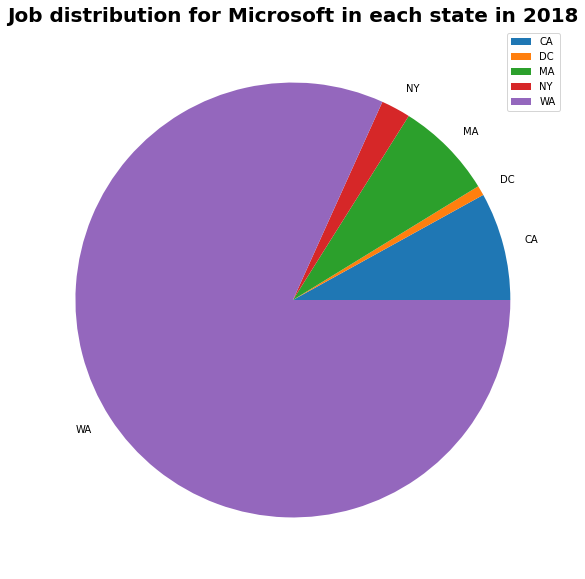

In [29]:
microsoft = alldata[alldata['company'] == 'Microsoft']
microsoft.groupby('state').size().plot(kind='pie', figsize=(15,10))
plt.ylabel('')
plt.title('Job distribution for Microsoft in each state in 2018', weight='bold',size=20)
plt.legend(loc="best")

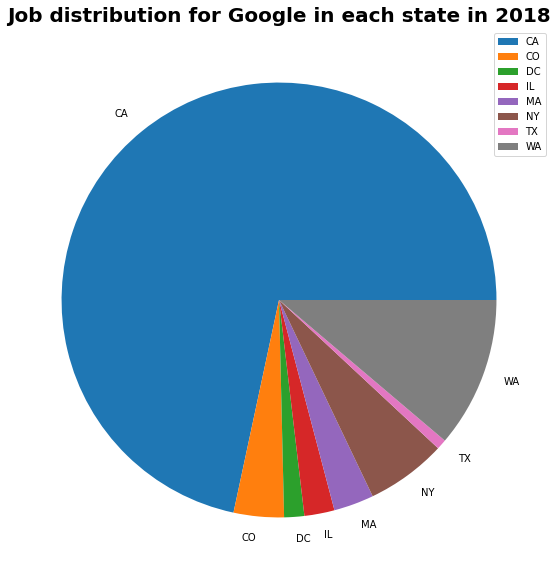

In [30]:
google = alldata[alldata['company'] == 'Google']
google.groupby('state').size().plot(kind='pie', figsize=(15,10))
plt.ylabel('')
plt.title('Job distribution for Google in each state in 2018', weight='bold',size=20)
plt.legend(loc="best")

## What kind of skills and tools are needed when applying for jobs?

In [31]:
#testing
alldata['description'][0].lower().split() #lower every word and split
excel = [row.lower().count('excel') for row in alldata['description']]
sum(excel)
database = [row.lower().count('database') for row in alldata['description']]
sum(database)
python = [row.lower().count('python') for row in alldata['description']]
sum(python)

3717

In [32]:
#create a function for words count
def countwords(word):
    n_word = [row.lower().count(word) for row in alldata['description']]
    return (word, sum(n_word))
    #return (sum(n_word))

In [33]:
countwords("teamwork") #testing

('teamwork', 309)

In [34]:
#some skills that company wants
skills = ['programming skill','communication skill',
          'machine learning','presentation',
          'teamwork','data analysis','data visualization',
         'modeling','deep learning','optimization','decision tree',
         'statistical analysis']

In [35]:
#some tools or skills that are desired to have
tools_skills = ['sas','spark','d3','matlab','excel','ggplot2',
         'tableau','jupyter','matplotlib','nltk',
         'tensorflow','scikit-learn','weka','oracle',
         'python','statistic','java','sql',
          'aws','hadoop','math','linux','hive',
          'html','css','javascript']

In [36]:
tools_skills = [countwords(toolskill) for toolskill in tools_skills]
tools_skills

[('sas', 1312),
 ('spark', 1306),
 ('d3', 199),
 ('matlab', 608),
 ('excel', 5831),
 ('ggplot2', 13),
 ('tableau', 601),
 ('jupyter', 63),
 ('matplotlib', 44),
 ('nltk', 30),
 ('tensorflow', 442),
 ('scikit-learn', 193),
 ('weka', 34),
 ('oracle', 260),
 ('python', 3717),
 ('statistic', 7850),
 ('java', 1968),
 ('sql', 3029),
 ('aws', 1706),
 ('hadoop', 1121),
 ('math', 2618),
 ('linux', 630),
 ('hive', 621),
 ('html', 264),
 ('css', 195),
 ('javascript', 459)]

In [37]:
#create a df with freq for each keyword
tools_skills = pd.DataFrame(tools_skills, columns = ['tools and skills', 'word count'])
tools_skills = tools_skills.sort_values('word count',ascending = True)
tools_skills

,tools and skills,word count
5,ggplot2,13
9,nltk,30
12,weka,34
8,matplotlib,44
7,jupyter,63
11,scikit-learn,193
24,css,195
2,d3,199
13,oracle,260
23,html,264


In [38]:
#word freq
skills_required = [countwords(skill) for skill in skills]
skills_required

[('programming skill', 347),
 ('communication skill', 2934),
 ('machine learning', 7205),
 ('presentation', 2311),
 ('teamwork', 309),
 ('data analysis', 1949),
 ('data visualization', 704),
 ('modeling', 2936),
 ('deep learning', 1064),
 ('optimization', 1580),
 ('decision tree', 158),
 ('statistical analysis', 724)]

In [39]:
#create df for skills_required for applying job
skills_required = pd.DataFrame(skills_required, columns = ['skills', 'word count'])
skills_required = skills_required.sort_values('word count',ascending = True)
skills_required

,skills,word count
10,decision tree,158
4,teamwork,309
0,programming skill,347
6,data visualization,704
11,statistical analysis,724
8,deep learning,1064
9,optimization,1580
5,data analysis,1949
3,presentation,2311
1,communication skill,2934


Text(0.5, 1.0, 'What kind of skills are needed when applying for jobs?')

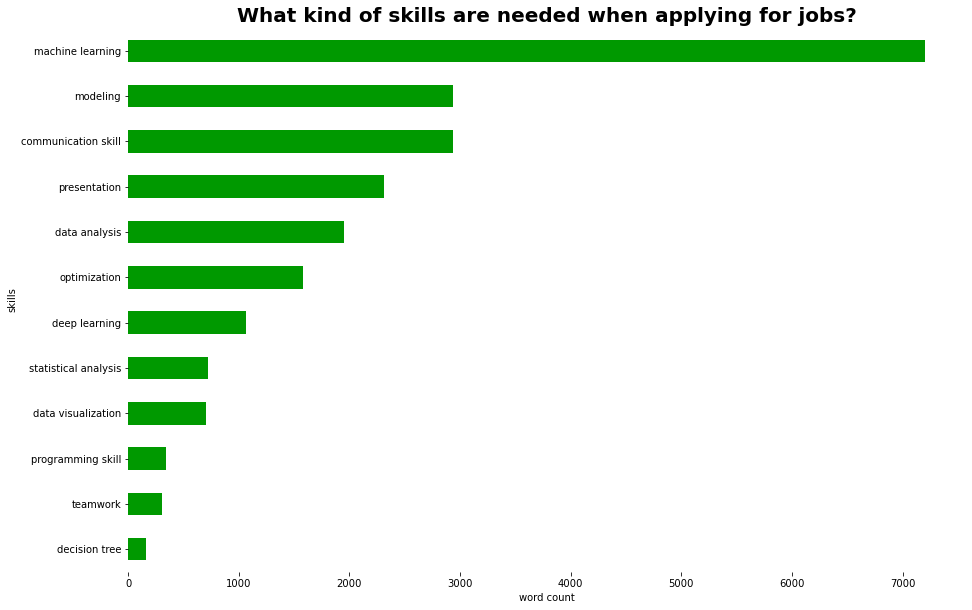

In [40]:
ax_s = skills_required.plot('skills',kind='barh',figsize=(15, 10), color='#009900')
ax_s.spines['right'].set_visible(False)
ax_s.spines['top'].set_visible(False)
ax_s.spines['left'].set_visible(False)
ax_s.spines['bottom'].set_visible(False)
ax_s.legend().set_visible(False)
ax_s.set_xlabel('word count')
ax_s.set_title('What kind of skills are needed when applying for jobs?', weight='bold', size=20)

Text(0.5, 1.0, 'What kind of skills and tools are needed when applying for jobs?')

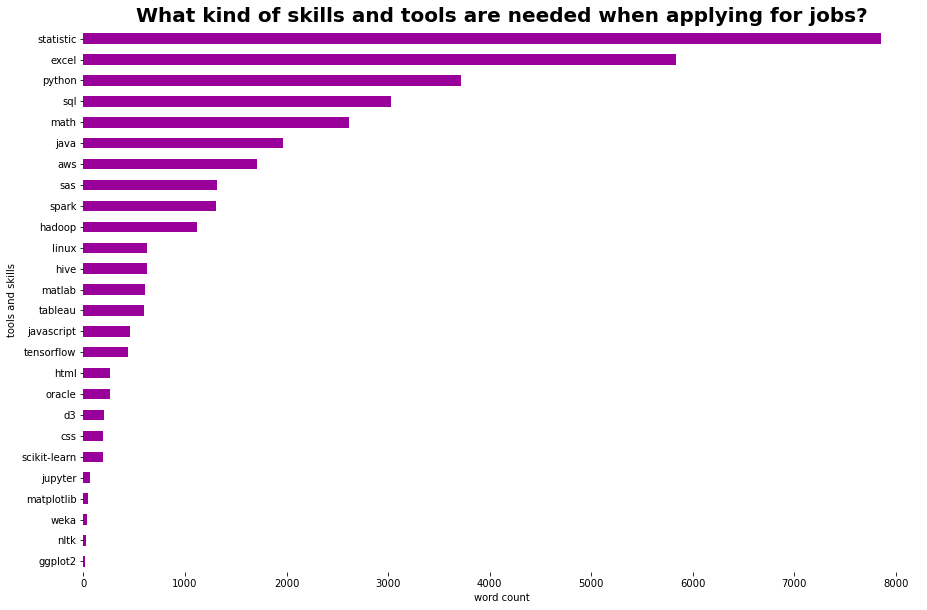

In [41]:
ax_ts = tools_skills.plot('tools and skills',kind='barh',figsize=(15, 10),color = '#990099')
ax_ts.spines['right'].set_visible(False)
ax_ts.spines['top'].set_visible(False)
ax_ts.spines['left'].set_visible(False)
ax_ts.spines['bottom'].set_visible(False)
ax_ts.legend().set_visible(False)
ax_ts.set_xlabel('word count')
ax_ts.set_title('What kind of skills and tools are needed when applying for jobs?', weight='bold', size=20)

In [42]:
amazon['description']

79      Job Description\nDo you love data? Do you like...
105     Job Description\nAmazon Transportation Service...
284     Job Description\nDo you want to help build a h...
401     Job Description\nAmazon’s mission is to be the...
802     Job Description\nInterested in Amazon Echo? We...
                              ...                        
6947    Job Description\nExternal job description\nAma...
6950    Job Description\nInterested in making the ‘Ale...
6953    Job Description\nAmazon is looking for a passi...
6955    Job Description\nToday, people spend too much ...
6956    Job Description\nAlexa is Amazon's new cloud-b...
Name: description, Length: 358, dtype: object

In [43]:
text = " "
for t in amazon['description']:
    t=str(t)
    text+=t

In [44]:
text = text.lower()

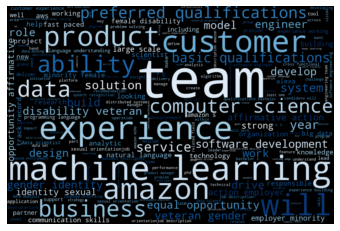

In [45]:
#text = amazon['description'][105]
wordcloud = WordCloud(width=1280, height=853, margin=0,
                      colormap='Blues').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

## Degrees?

In [46]:
countwords("chemical engineering") #testing

('chemical engineering', 129)

In [47]:
#degree list
degrees = ['master',"master's",'phd','bachelor',"bachelor's"]

In [48]:
degrees = [countwords(degree) for degree in degrees]
degrees

[('master', 2408),
 ("master's", 627),
 ('phd', 1974),
 ('bachelor', 2314),
 ("bachelor's", 831)]

In [49]:
m = degrees[0][1]+degrees[1][1]
p = degrees[2][1]
b = degrees[3][1]+degrees[4][1]
Degrees = [('Masters', m), ('PhD', p), ("Bachelor's", b)]
Degrees

[('Masters', 3035), ('PhD', 1974), ("Bachelor's", 3145)]

In [50]:
Degrees = pd.DataFrame(Degrees, columns = ['degree', 'count'])
Degrees = Degrees.sort_values('count',ascending = False)
Degrees

,degree,count
2,Bachelor's,3145
0,Masters,3035
1,PhD,1974


<ipython-input-51-b18bc6b15891>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  (markerline, stemlines, baseline) = plt.stem(Degrees['degree'],Degrees['count'])


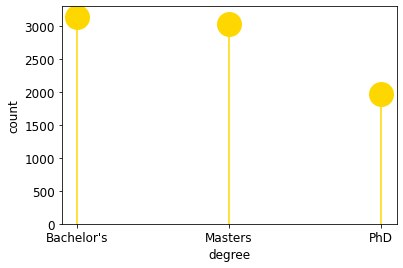

In [51]:
#A lollipop plot is an hybrid between a scatter plot and a barplot.
(markerline, stemlines, baseline) = plt.stem(Degrees['degree'],Degrees['count'])
plt.setp(markerline, marker='o', markersize=20,
         markeredgewidth=5, color='gold')
plt.setp(stemlines, color='gold')
plt.setp(baseline, visible=False)

plt.tick_params(labelsize=12)
plt.xlabel('degree', size=12)
plt.xticks(rotation=0)
plt.ylabel('count', size=12)
plt.ylim(bottom=0)

plt.show()